# Euclid’s theorem

https://en.wikipedia.org/wiki/Euclid%27s_theorem

In [1]:
import warnings
warnings.filterwarnings("ignore")

import sympy
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()


In [2]:
# Define the stock symbol and time period
symbol = "AAPL"
start_date = "2023-01-01"
end_date = "2023-02-01"


In [3]:
# Retrieve the historical data for the stock
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Extract the closing prices from the data
closing_prices = df["Adj Close"]


In [5]:
# Find the prime factorization of each closing price
for price in closing_prices:
    factors = []
    divisor = 2
    while divisor <= price:
        if price % divisor == 0:
            factors.append(divisor)
            price //= divisor
        else:
            divisor += 1
    print(f"Prime factors of {price}: {factors}")

Prime factors of 124.87932586669922: []
Prime factors of 126.16736602783203: []
Prime factors of 124.82939910888672: []
Prime factors of 129.42239379882812: []
Prime factors of 129.9515838623047: []
Prime factors of 130.53070068359375: []
Prime factors of 133.2864990234375: []
Prime factors of 133.2066192626953: []
Prime factors of 134.55455017089844: []
Prime factors of 135.73275756835938: []
Prime factors of 135.00387573242188: []
Prime factors of 135.06378173828125: []
Prime factors of 137.65980529785156: []
Prime factors of 140.89488220214844: []
Prime factors of 142.31271362304688: []
Prime factors of 141.64373779296875: []
Prime factors of 143.74053955078125: []
Prime factors of 145.70751953125: []
Prime factors of 142.78199768066406: []
Prime factors of 144.0700225830078: []


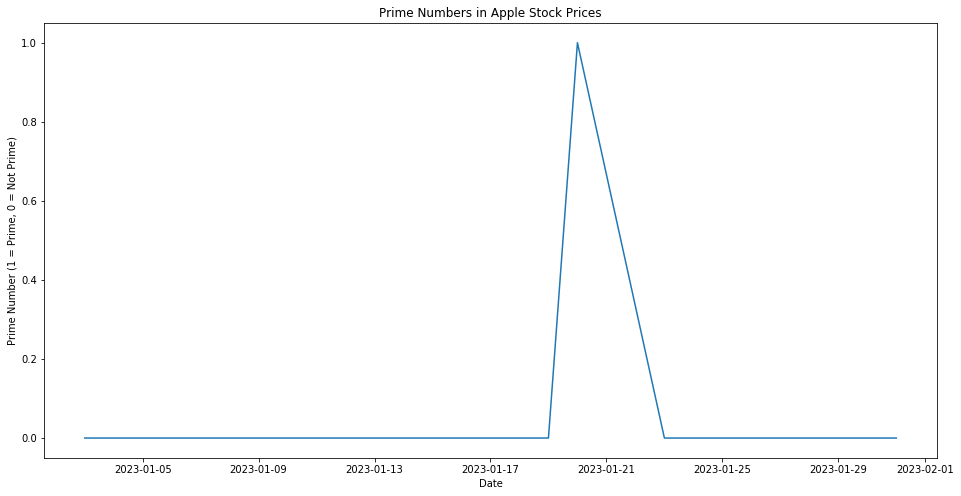

In [6]:
# Determine if each closing price is prime
is_prime = []
for price in closing_prices:
    is_prime.append(sympy.isprime(int(price)))

# Plot the distribution of prime numbers over time
plt.figure(figsize=(16,8))
plt.plot(closing_prices.index, is_prime)
plt.title("Prime Numbers in Apple Stock Prices")
plt.xlabel("Date")
plt.ylabel("Prime Number (1 = Prime, 0 = Not Prime)")
plt.show()

In [7]:
# Define a and b as the closing prices of AAPL on the current and previous days, respectively
a = df["Close"][-1]
b = df["Close"][-2]

# Apply Euclid's theorem to calculate q and r
q = a // b
r = a % b

# Interpret the result
print(f"The closing price of {symbol} today ({a}) can be expressed as {q} times the closing price of AAPL yesterday ({b}) plus a remainder of {r}.")

The closing price of AAPL today (144.2899932861328) can be expressed as 1.0 times the closing price of AAPL yesterday (143.0) plus a remainder of 1.2899932861328125.


### Find the Greatest Common Divisor

In [8]:
# Retrieve historical data for two stocks
start = "2020-01-01"
end = "2023-05-01"
stock1 = yf.download("AMD", start, end)
stock2 = yf.download("INTC", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
# Extract closing prices for each stock
prices1 = stock1["Adj Close"].values
prices2 = stock2["Adj Close"].values

# Define a function to calculate the GCD using Euclid's algorithm
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

# Find the GCD of the closing prices for each stock
gcd_prices = gcd(prices1[-1], prices2[-1])
print("GCD of closing prices:", gcd_prices)

GCD of closing prices: 7.62939453125e-06
